In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os
import json
import requests
import time
import datetime as dt
from datetime import date, timedelta, datetime

from itertools import repeat
import itertools

import statistics as st
import scipy.stats as ss
from random import randint

In [2]:
#importing the dataset
df =pd.read_csv(r'c://Users/AB/Desktop/districts_info.csv')
df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [4]:
de=pd.read_csv(r'c://Users/AB/Desktop/engagement_data/*')
de

,time,lp_id,pct_access,engagement_index
0,2020-01-01,93690.0,0.00,NaN
1,2020-01-01,17941.0,0.03,0.90
2,2020-01-01,65358.0,0.03,1.20
3,2020-01-01,98265.0,0.57,37.79
4,2020-01-01,59257.0,0.00,NaN
...,...,...,...,...
103998,2020-12-31,68845.0,0.00,NaN
103999,2020-12-31,28324.0,0.00,NaN
104000,2020-12-31,64947.0,0.00,NaN
104001,2020-12-31,13496.0,0.03,0.26


In [5]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104003 entries, 0 to 104002
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time              104003 non-null  object 
 1   lp_id             104001 non-null  float64
 2   pct_access        104003 non-null  float64
 3   engagement_index  61655 non-null   float64
dtypes: float64(3), object(1)
memory usage: 3.2+ MB


In [6]:
dp =pd.read_csv(r'c://Users/AB/Desktop/products_info.csv')
dp.head()

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [7]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   lp_id                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


# Cleaning the Given Data Values

In [8]:
dp.isnull().sum()

lp_id                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

There is no much null values so no need to drop them.

In [9]:
de.isnull().sum()

time                    0
lp_id                   2
pct_access              0
engagement_index    42348
dtype: int64

More than 40% of engagement_index is null so we can drop the column.


In [10]:
de_clean=de.drop(['engagement_index'],axis=1)

In [11]:
de_clean

,time,lp_id,pct_access
0,2020-01-01,93690.0,0.00
1,2020-01-01,17941.0,0.03
2,2020-01-01,65358.0,0.03
3,2020-01-01,98265.0,0.57
4,2020-01-01,59257.0,0.00
...,...,...,...
103998,2020-12-31,68845.0,0.00
103999,2020-12-31,28324.0,0.00
104000,2020-12-31,64947.0,0.00
104001,2020-12-31,13496.0,0.03


In [12]:
df.isnull().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

We are going to drop the data values that have more than 30% null values. These columns are :

    -pct_free/reduced
    -county_connections_ratio  
    -pp_total_raw

In [13]:
df_pc=df.drop(['pct_free/reduced'],axis=1)

In [14]:
df_cr=df_pc.drop(['county_connections_ratio'], axis=1)

In [15]:
df_clean=df_cr.drop(['pp_total_raw'], axis=1)

In [16]:
df_clean

,district_id,state,locale,pct_black/hispanic
0,8815,Illinois,Suburb,"[0, 0.2["
1,2685,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2["
3,3188,NaN,NaN,NaN
4,2238,NaN,NaN,NaN
...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2["
229,8103,Tennessee,Rural,"[0.2, 0.4["
230,4929,Virginia,Rural,"[0, 0.2["
231,7975,California,City,"[0.6, 0.8["


# Merge The data values to get some insights

In [17]:
result_join = dp.merge(de_clean, on='lp_id', how='left')

In [18]:
result_join

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,time,pct_access
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-06,0.03
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-07,0.00
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-10,0.03
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-14,0.00
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-15,0.00
...,...,...,...,...,...,...,...,...
63357,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-28,0.08
63358,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-29,0.10
63359,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-30,0.05
63360,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-31,0.10


In [19]:
result_join.isnull().sum()

lp_id                            0
URL                              0
Product Name                     0
Provider/Company Name            1
Sector(s)                     2481
Primary Essential Function    2481
time                             6
pct_access                       6
dtype: int64

The Null values are below 3.9% so no need of deleting them.

# Analysis on Products for digital learning

Text(0.5, 1.0, 'Top 10 Company')

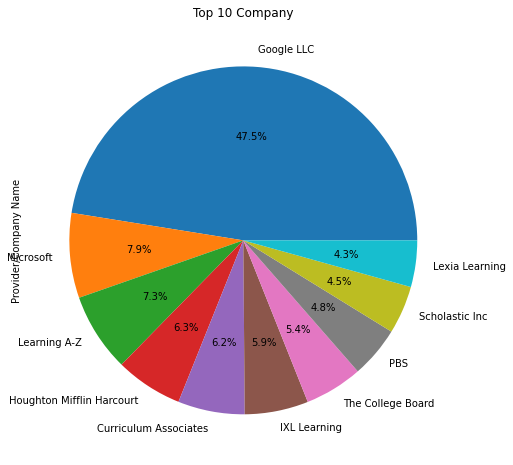

In [21]:
result_join['Provider/Company Name'].value_counts().head(10).plot.pie(figsize= (18, 8), autopct='%1.1f%%')
plt.title("Top 10 Company")

Most products for the dlearning used by the students is Google classroom products which are Google LLC. Then microsoft!

In [22]:
order_join=result_join.sort_values('time')

In [23]:
order_join

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,time,pct_access
19721,98265,http://quizlet.com/,Quizlet,Quizlet,PreK-12,LC - Study Tools,2020-01-01,0.57
40003,46123,https://www.collegeboard.org/,College Board,The College Board,PreK-12,SDO - Large-Scale & Standardized Testing,2020-01-01,0.00
55983,53399,https://spark.adobe.com/about/page,Adobe Spark Page,Adobe Inc.,NaN,NaN,2020-01-01,0.00
16706,19181,http://noodletools.com/,NoodleTools,NoodleTools,PreK-12; Higher Ed,LC - Study Tools,2020-01-01,0.15
52482,90153,https://www.netflix.com/,Netflix,Netflix,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",2020-01-01,0.06
...,...,...,...,...,...,...,...,...
41645,24829,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,NaN,NaN
46373,41675,http://onlinelibrary.uen.org/,onlinelibrary.uen.org,Utah Education Network,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Digital Co...",NaN,NaN
63271,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other,NaN,NaN
63272,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,NaN,NaN


In [24]:
# Create "Year", "Month" & "DayOfMonth" columns
order_join['time']= pd.to_datetime(order_join['time'], format= "%Y-%m-%d")
order_join["Year"] = order_join["time"].apply(lambda x: x.year)
order_join["Month"] = order_join["time"].apply(lambda x: x.month)
order_join["DayOfMonth"] = order_join["time"].apply(lambda x: x.day)

In [25]:
order_join

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,time,pct_access,Year,Month,DayOfMonth
19721,98265,http://quizlet.com/,Quizlet,Quizlet,PreK-12,LC - Study Tools,2020-01-01,0.57,2020.0,1.0,1.0
40003,46123,https://www.collegeboard.org/,College Board,The College Board,PreK-12,SDO - Large-Scale & Standardized Testing,2020-01-01,0.00,2020.0,1.0,1.0
55983,53399,https://spark.adobe.com/about/page,Adobe Spark Page,Adobe Inc.,NaN,NaN,2020-01-01,0.00,2020.0,1.0,1.0
16706,19181,http://noodletools.com/,NoodleTools,NoodleTools,PreK-12; Higher Ed,LC - Study Tools,2020-01-01,0.15,2020.0,1.0,1.0
52482,90153,https://www.netflix.com/,Netflix,Netflix,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ...",2020-01-01,0.06,2020.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
41645,24829,http://www.utahcompose.com/,Utah Compose,Measurement Incorporated,PreK-12,LC - Study Tools,NaT,NaN,NaN,NaN,NaN
46373,41675,http://onlinelibrary.uen.org/,onlinelibrary.uen.org,Utah Education Network,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Digital Co...",NaT,NaN,NaN,NaN,NaN
63271,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other,NaT,NaN,NaN,NaN,NaN
63272,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,NaT,NaN,NaN,NaN,NaN


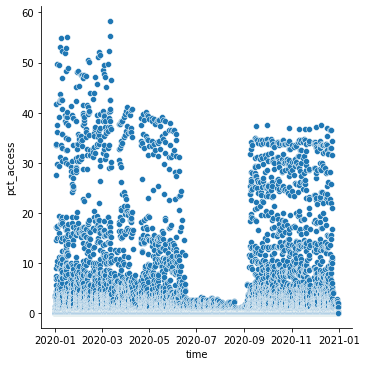

In [26]:
sns.relplot(x="time", y="pct_access", data=order_join)

-During the first three months after covid-19 started(31/12/2019~01/01/2020) percentage of students in the district have at least one page-load event of a given product on a given day are high but sparcily distributed.

-During the second three months after covid-19 started(01/04/2020~30/06/2020) percentage of students in the district have at least one page-load event of a 
given product on a given day shows some decrease and continue in uneven distribution.

-During the third three months after covid-19 started(01/07/2020~30/09/2020) percentage of students in the district have at least one page-load event of a
given product on a given day are very low.

-During the last three months of 2020 percentage of students in the district have at least one page-load event of a 
given product start to rise in even distribution than previous months.

-Generally we can understand one thing the percentage of students have at least one page load per day is very small.
The most of students in the districts are concentrated around small pct_access rate.

# NEXT

In [ ]:
all_data=order_join.concat(df_clean, on='district_id', how='left').dropna()